In [1]:
import time
import numpy as np
import networkx as nx
from utils.dotdict import dotdict
import matplotlib.pyplot as plt
from numba import jit

import itertools
import multiprocessing

from utils.graph_generator import get_graph

from scripts.awareness.agent_country import Agent_Country

args = dotdict({
    "logfile": "log/line1.log",
    "plot": False,
    "max_iteration": 1000,
    "beta_super":0.0,
    "xi": 1,
    "p_teleport":0.0,
    "MAX_E_TIME":10,
    "MAX_I_TIME":10,
    "super_infected_agents": [],
    "p_super": 0.0,
    "awM": None,
    "awR": -1,
    "random_seed":0,
    "CPU_cores":2,
    "simnum":10,
})

In [13]:
def run(args, beta, gamma, n, awM, callback = None):
    args = dotdict(args)
    graph = get_graph("path", {"n": n, "population": 1})
    args["I_time"]=int(1/gamma)
    args["infected_agents"]=[n//2]
    args["beta"]=beta
    args["gamma"]=gamma
    args["awM"] = awM

    country = Agent_Country(args, graph)
    history,merged = country.run_fast(0, args.infected_agents, simnum=args["simnum"], callback=callback)
    
    return history

In [23]:
@jit(nopython=True)
def chill(hist, max_iter):
    return hist

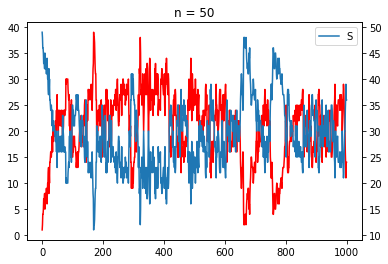

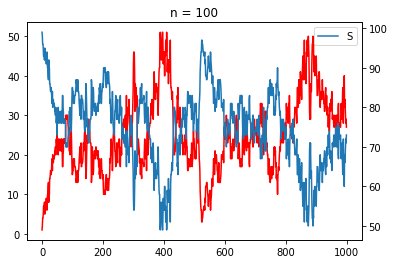

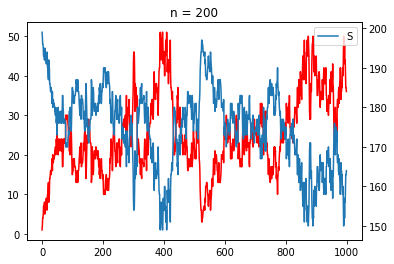

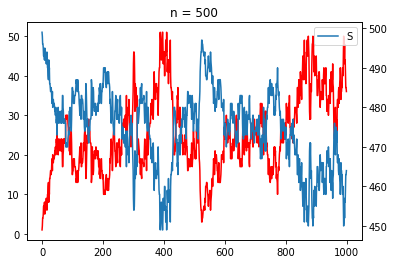

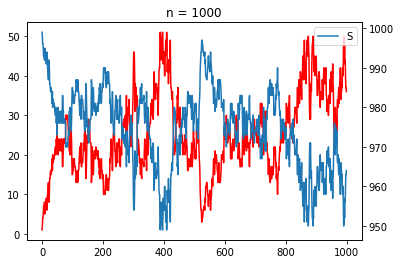

In [27]:
for n in [50,100,200,500,1000]:
    hist = run(args, 0.4,0.3,n,0.0, chill)

    plt.plot(hist[0,:,2], label="I", c="r")
    ax=plt.gca().twinx()
    ax.plot(hist[0,:,0], label="S")
    
    plt.title("n = "+str(n))
    
    plt.legend()
    plt.show()

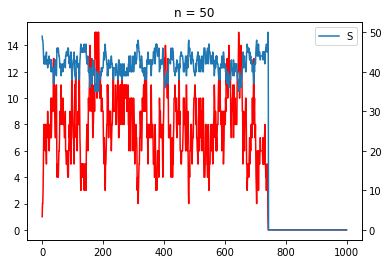

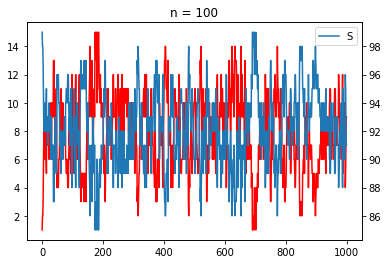

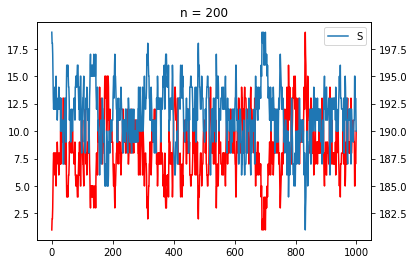

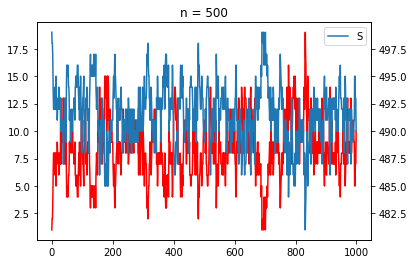

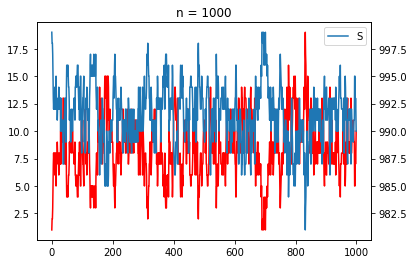

In [35]:
for n in [50,100,200,500,1000]:
    hist = run(args, 0.7,0.3,n,0.1, chill)

    plt.plot(hist[0,:,2], label="I", c="r")
    ax=plt.gca().twinx()
    ax.plot(hist[0,:,0], label="S")
    
    plt.title("n = "+str(n))
    
    plt.legend()
    plt.show()

# Infected time in each node